In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
#matplotlib inline

In [60]:
x1 = torch.linspace(-1,1,100) #在[-1,1]间等距采100个点
x2 = torch.linspace(-1,1,100) #在[-1,1]间等距采100个点
y = np.sin(x1 * x2)
x1 = x1.view(-1) 
x2 = x2.view(-1)
y = y.view(-1,1) #对应作调整，使得能够计算损失
X = torch.stack((x1, x2), dim=1)

In [61]:
class Net(nn.Module): #继承nn.Module后，模型能够被训练(并不只是继承nn.Module才行)
    def __init__(self,dim_input,dim_hidden,dim_output):
        super(Net,self).__init__() #调用Net父类，即nn.Module的初始化方法。这一步是必须的
        #下面对模型的结构进行定义
        self.N = nn.Sequential(
            nn.Linear(dim_input,dim_hidden),
            nn.ReLU(),
            nn.Linear(dim_hidden,dim_output)
        )
    def forward(self, x):
        return self.N(x)
net = Net(dim_input=2,dim_hidden=10,dim_output=1)
net

Net(
  (N): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=1, bias=True)
  )
)

In [64]:
optimizer = torch.optim.SGD(net.parameters(),lr=0.2)
criterion = nn.MSELoss()
for epoch in range(100):
    out = net(X) #模型用当前的参数对输入进行变换，得到输出
    loss = criterion(out,y) #计算模型输出与预期输出的差距
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
#     print(loss.data.numpy())

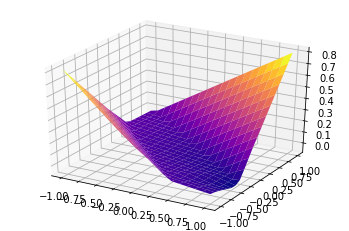

In [65]:
def Render():
    u = torch.linspace(-1,1,20)
    grid_x,grid_y = torch.meshgrid(u,u) #生成以原点为中心，长度为2，400个采样点的正方形网格
    #将网格按固定顺序拉直
    x = grid_x.contiguous().view(-1,1)
    y = grid_y.contiguous().view(-1,1)
    #在对应位置合并x,y
    sample = torch.cat([x,y],dim=1) #sample形状为(400,2)，作为输入
    out = net(sample) #得到网络的输出，形状为(400,1)
    # print(out.shape)
    z = out.view(20,20) #还原为网格

    #使用网格绘制曲面
    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.pyplot as plt

    #初始化画布
    fig = plt.figure()
    ax = fig.add_subplot(111,projection = '3d')

    #绘制
    ax.plot_surface(grid_x.data.numpy(),grid_y.data.numpy(),z.data.numpy(),rstride=1,cstride=1,cmap = 'plasma')
    plt.show()
    
Render()